<a href="https://colab.research.google.com/github/egipatabuga/computer_vision/blob/main/neural_network/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Download dataset
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1yu6q87l3BIkb9MkbOlRRUj548fgQyX8E' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1yu6q87l3BIkb9MkbOlRRUj548fgQyX8E" -O /tmp/Sampel.zip && rm -rf /tmp/cookies.txt

--2021-11-22 13:50:59--  https://docs.google.com/uc?export=download&confirm=xWjw&id=1yu6q87l3BIkb9MkbOlRRUj548fgQyX8E
Resolving docs.google.com (docs.google.com)... 142.250.68.78, 2607:f8b0:4007:811::200e
Connecting to docs.google.com (docs.google.com)|142.250.68.78|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-5o-docs.googleusercontent.com/docs/securesc/9585u198947943id6jlselegm9db43jn/dbh4fkptmr7ducdgi0548jo6dkn1i12a/1637589000000/07659999437877666745/07183423630701760581Z/1yu6q87l3BIkb9MkbOlRRUj548fgQyX8E?e=download [following]
--2021-11-22 13:50:59--  https://doc-0o-5o-docs.googleusercontent.com/docs/securesc/9585u198947943id6jlselegm9db43jn/dbh4fkptmr7ducdgi0548jo6dkn1i12a/1637589000000/07659999437877666745/07183423630701760581Z/1yu6q87l3BIkb9MkbOlRRUj548fgQyX8E?e=download
Resolving doc-0o-5o-docs.googleusercontent.com (doc-0o-5o-docs.googleusercontent.com)... 142.250.176.1, 2607:f8b0:4007:809::2001
Connecting to doc-0o-5

In [10]:
import os
import zipfile

local_zip = '/tmp/Sampel.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [11]:
base_dir = '/tmp/Sampel'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_seledri_dir = os.path.join(train_dir, 'seledri')
train_pandan_dir = os.path.join(train_dir, 'pandan')

validation_seledri_dir = os.path.join(validation_dir, 'seledri')
validation_pandan_dir = os.path.join(validation_dir, 'pandan')

In [12]:
# Cek penamaan image yang ada di folder train_seledri_dir dan train_pandan_dir
print(os.listdir(train_seledri_dir)[:10])
print(os.listdir(train_pandan_dir)[:10])

['047.jpg', '026.jpg', '037.jpg', '021.jpg', '014.jpg', '012.jpg', '019.jpg', '022.jpg', '027.jpg', '028.jpg']
['068.jpg', '096.jpg', '098.jpg', '078.jpg', '091.jpg', '073.jpg', '075.jpg', '082.jpg', '100.jpg', '084.jpg']


In [13]:
# Cek jumlah data train dan data validation
print('total training seledri images:', len(os.listdir(train_seledri_dir)))
print('total training pandan images:', len(os.listdir(train_pandan_dir)))
print('total validation seledri images:', len(os.listdir(validation_seledri_dir)))
print('total validation pandan images:', len(os.listdir(validation_pandan_dir)))

total training seledri images: 40
total training pandan images: 40
total validation seledri images: 10
total validation pandan images: 10


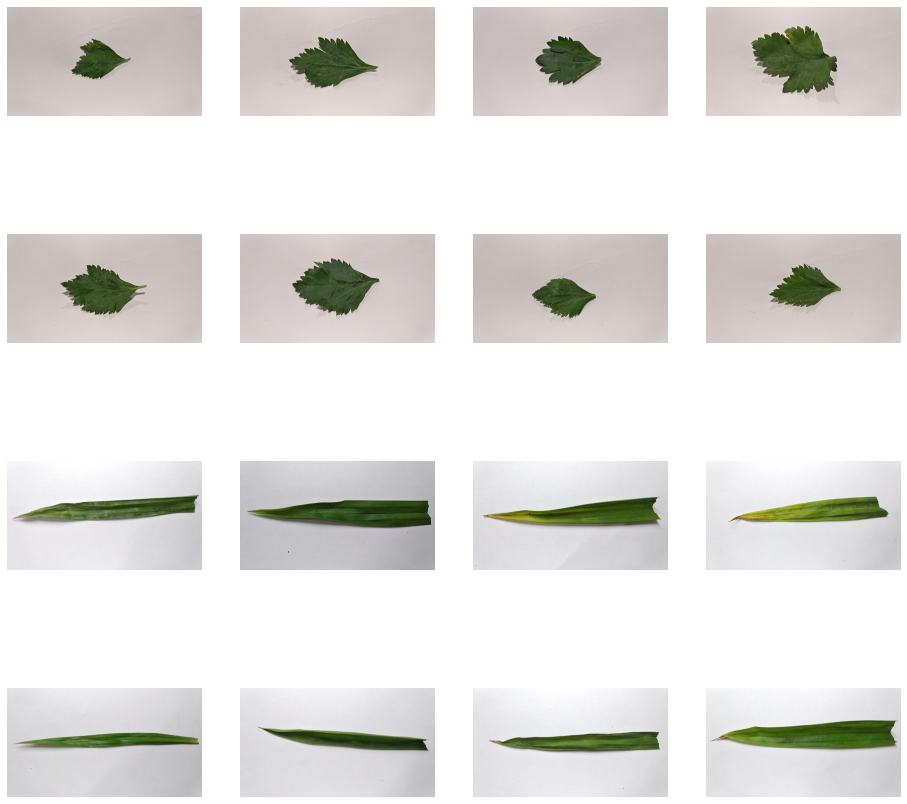

In [14]:
# Tampilkan 8 image per kelas dengan ukuran 4x4 

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_seledri_pix = [os.path.join(train_seledri_dir, fname) 
                for fname in os.listdir(train_seledri_dir)[pic_index-8:pic_index]]
next_pandan_pix = [os.path.join(train_pandan_dir, fname) 
                for fname in os.listdir(train_pandan_dir)[pic_index-8:pic_index]]

for i, img_path in enumerate(next_seledri_pix+next_pandan_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [15]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [16]:
# Gather data validation
val_data = []
val_label = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

Data Preprocessing

In [17]:
# Tampilkan shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (80, 150, 150, 3)
Train Label =  (80,)
Validation Data =  (20, 150, 150, 3)
Validation Label =  (20,)


In [18]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [251 249 249]
Data setelah di-normalisasi  [0.9843137 0.9764706 0.9764706]


In [21]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[35:45])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[35:45])

Label sebelum di-encoder  ['pandan' 'pandan' 'pandan' 'pandan' 'pandan' 'seledri' 'seledri'
 'seledri' 'seledri' 'seledri']
Label setelah di-encoder  [0 0 0 0 0 1 1 1 1 1]


Definisikan Model

In [22]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [23]:
# Buat model dengan 1 input layer, 1 hidden layer, dan 1 output layer
img_input = layers.Input(shape=(150, 150, 3)) # layer input
x = layers.Flatten()(img_input) # ubah dari matriks 150x150x3 menjadi vektor
x = layers.Dense(128, activation='relu')(x) # hidden layer 1 dengan 128 neuron
output = layers.Dense(1, activation='sigmoid')(x) # output layer dengan 1 neuron (binary)

# Definisikan modelnya
model = Model(img_input, output)

In [24]:
# Tampilkan model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 flatten (Flatten)           (None, 67500)             0         
                                                                 
 dense (Dense)               (None, 128)               8640128   
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 8,640,257
Trainable params: 8,640,257
Non-trainable params: 0
_________________________________________________________________


In [25]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [26]:
H = model.fit(x_train, y_train, batch_size=20, epochs=50, validation_data=(x_val, y_val))

Epoch 1/50
4/4 [==============================] - 1s 96ms/step - loss: 42.8505 - acc: 0.4500 - val_loss: 0.6925 - val_acc: 0.5000
Epoch 2/50
4/4 [==============================] - 0s 52ms/step - loss: 1.2809 - acc: 0.4875 - val_loss: 0.6927 - val_acc: 0.5000
Epoch 3/50
4/4 [==============================] - 0s 57ms/step - loss: 0.6895 - acc: 0.5250 - val_loss: 0.6925 - val_acc: 0.5000
Epoch 4/50
4/4 [==============================] - 0s 49ms/step - loss: 0.6931 - acc: 0.5000 - val_loss: 0.6925 - val_acc: 0.5000
Epoch 5/50
4/4 [==============================] - 0s 51ms/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6925 - val_acc: 0.5000
Epoch 6/50
4/4 [==============================] - 0s 52ms/step - loss: 0.6931 - acc: 0.5000 - val_loss: 0.6925 - val_acc: 0.5000
Epoch 7/50
4/4 [==============================] - 0s 53ms/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6925 - val_acc: 0.5000
Epoch 8/50
4/4 [==============================] - 0s 53ms/step - loss: 0.6932 - acc: 0.5000 - va

Evaluasi Model

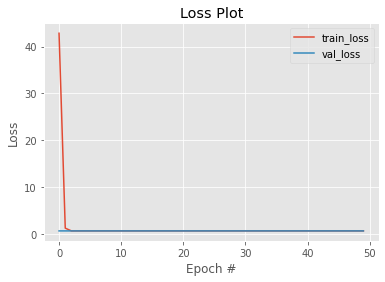

In [27]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

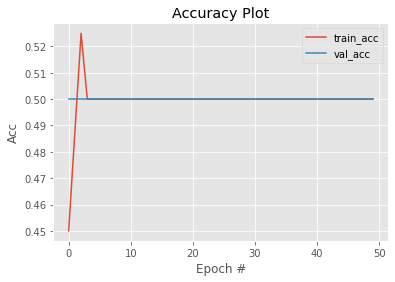

In [28]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 50), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [29]:
from sklearn.metrics import classification_report

pred = model.predict(x_val)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_val, labels))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67        10
           1       0.00      0.00      0.00        10

    accuracy                           0.50        20
   macro avg       0.25      0.50      0.33        20
weighted avg       0.25      0.50      0.33        20



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
